In [1]:
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from data import get_random_patches

In [8]:
def test_get_pathches(
        file: str,  # File path
        type="GT",  # type="GT" or "NOISY
        n_patches=6, patch_size=(256, 256), min_sigma=0.1, max_sigma=0.5,
        rand_seed=97) -> None:
    
    output_path = "patches_test"
    os.makedirs(output_path, exist_ok=True) # Create output folder if it doesn't exist

    # if rand_seed is not None:
    #     random.seed(rand_seed) # Random seed for reproducibility

    # sidd_files = get_sidd_files(input_path, type)
    # for i, file in tqdm(enumerate(sidd_files)):

    image = Image.open(file)
    # image = image.convert("L") # Convert to grayscale
    im_w, im_h = image.size
    
    print(f"im_w: {im_w}, im_h: {im_h}")
    print(f"patch_size: {patch_size}")
    # im_w, im_h = im_w//2, im_h//2
    # image = image.resize((im_w, im_h))


    plt.imshow(image, cmap="gray")
    plt.show();
    patches = get_random_patches(image, n_patches, patch_size)
    plt.figure(figsize=(6, 4))
    for i, (patch, x, y) in enumerate(patches):
        plt.subplot(2, 3, i+1)
        plt.axis("off")
        plt.title(f"Patch {i+1} - x: {x}, y: {y}", fontsize=6)
        plt.imshow(patch, cmap="gray")
    plt.show();
    # output_file = file.split("/")[-1].split(".")[0]
    # save_patches(patches, output_path, output_file, min_sigma, max_sigma)
    # break

im_w: 5312, im_h: 2988
patch_size: (256, 256)


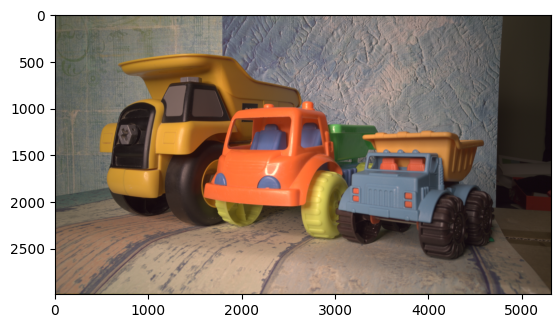

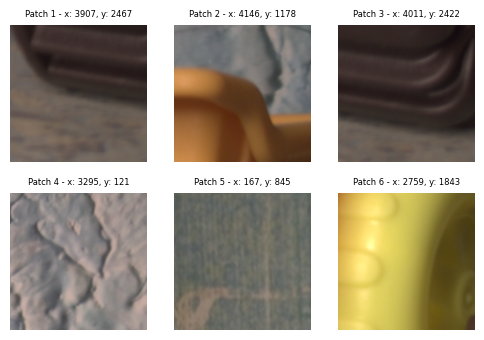

In [9]:
test_get_pathches(    
    # file = "images/medium/Data/0001_001_S6_00100_00060_3200_L/0001_GT_SRGB_010.PNG"
    file = "images/medium/Data/0123_006_G4_00400_00160_3200_N/0123_GT_SRGB_010.PNG"
)

In [1]:
from data import get_and_save_patches

def generate_patches():
    base_path="images"
    dataset_type="medium"
    output_folder="patches_test"
    input_path=f"{base_path}/{dataset_type}/Data"
    output_path=f"{base_path}/{output_folder}"

    # Took about 12 minutes to generate from 320 images, 32 pairs of RGB patches (clean and noisy) of size 256x256 from each image
    get_and_save_patches(input_path, output_path, type="GT", n_patches=32, patch_size=(256, 256), rand_seed=97)


In [2]:
generate_patches()


100%|██████████| 320/320 [07:03<00:00,  1.32s/it]
